In [1]:
import numpy as np
import matplotlib.pyplot as plt
import corner
from matplotlib.lines import Line2D
from help_functions import *

In [2]:
selected_params = ['H0', 'Omega_M', 'w']

fig_name = 'comp'
for i in selected_params:
    fig_name += f'_{i}'

In [3]:
H0, Omega_M, Omega_lambda, w, M = np.loadtxt('estimate_GRB_Nruns_1000.txt', unpack=True)

estimates = np.array([H0, Omega_M, Omega_lambda, w, M]).T

H0_SNIa, Omega_M_SNIa, Omega_lambda_SNIa, w_SNIa, M_SNIa = np.loadtxt('estimate_SNIa_Nruns_1000.txt', unpack=True)
H0_GRB, Omega_M_GRB, Omega_lambda_GRB, w_GRB, M_GRB = np.loadtxt('estimate_GRB_Nruns_1000.txt', unpack=True)
H0_clusters, Omega_M_clusters, Omega_lambda_clusters, w_clusters, M_clusters = np.loadtxt('estimate_clusters_Nruns_1000.txt', unpack=True)

estimates_SNIa = np.array([H0_SNIa, Omega_M_SNIa, Omega_lambda_SNIa, w_SNIa, M_SNIa]).T
estimates_GRB = np.array([H0_GRB, Omega_M_GRB, Omega_lambda_GRB, w_GRB, M_GRB]).T
estimates_clusters = np.array([H0_clusters, Omega_M_clusters, Omega_lambda_clusters, w_clusters, M_clusters]).T

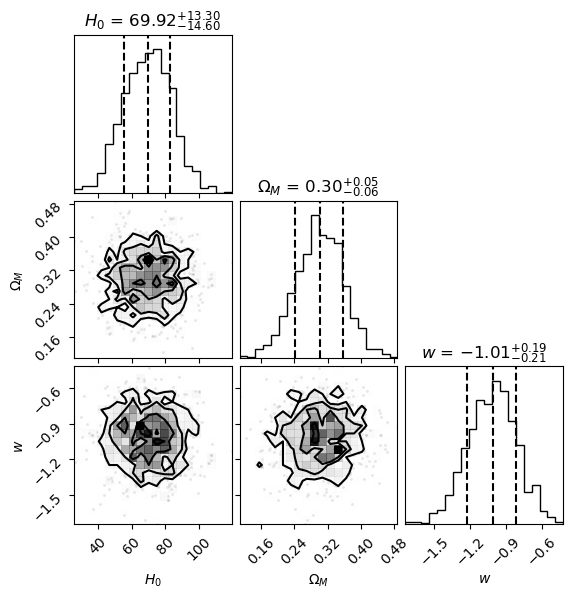

In [4]:
param_dict = {'H0': [0, r"$H_0$"], 'Omega_M': [1, r"$\Omega_M$"], 'Omega_lambda': [2,r"$\Omega_{\Lambda}$"], 'w':[3,r"$w$"], 'M':[4, r"$M_{SNIa}$"]}

data = estimates[:, [param_dict[i][0] for i in selected_params]]
labels = [param_dict[i][1] for i in selected_params]

# for combined results
figure = plt.figure(figsize=(6,6))
corner.corner(data, labels=labels,
    quantiles=[0.16, 0.5, 0.84],
    show_titles=True,
    title_kwargs={"fontsize": 12}, fig=figure)
figure.savefig(f'{fig_name}.png')

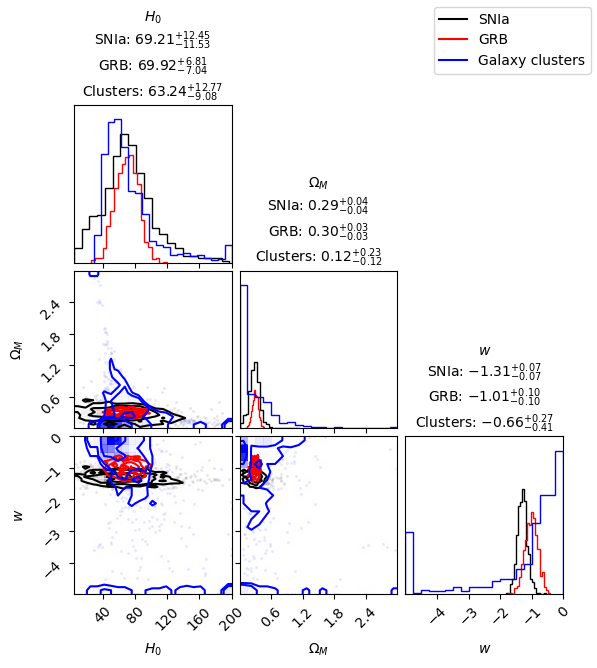

In [5]:
# Individual estimates
data_SNIa = estimates_SNIa[:, [param_dict[i][0] for i in selected_params]]
data_GRB = estimates_GRB[:, [param_dict[i][0] for i in selected_params]]
data_clusters = estimates_clusters[:, [param_dict[i][0] for i in selected_params]]

## Calculating confidence intervals for labels
ci_SNIa = [confidence_interval(data_SNIa[:, i]) for i in range(len(selected_params))]
ci_GRB = [confidence_interval(data_GRB[:, i]) for i in range(len(selected_params))]
ci_clusters = [confidence_interval(data_clusters[:, i]) for i in range(len(selected_params))]


figure = plt.figure(figsize=(6,6))
SNIa = corner.corner(data_SNIa, labels=labels, fig=figure, color='black', show_titles=False)
corner.corner(data_GRB, fig=figure, labels=labels,color='red', show_titles=False)
corner.corner(data_clusters, fig=figure, labels=labels, color='blue', show_titles=False)


# get the required axes
axes = figure.get_axes()
new_axes = [axes[i] for i in np.arange(0, (len(selected_params))**2, (len(selected_params) + 1))]
# set the title for the subplots
for i in range(len(selected_params)):
    title = (f'{labels[i]}\n'
             f'SNIa: ${ci_SNIa[i][0]:.2f}_{{{ci_SNIa[i][1]-ci_SNIa[i][0]:.2f}}}^{{+{ci_SNIa[i][2]-ci_SNIa[i][0]:.2f}}}$\n'
             f'GRB: ${ci_GRB[i][0]:.2f}_{{{ci_GRB[i][1]-ci_GRB[i][0]:.2f}}}^{{+{ci_GRB[i][2]-ci_GRB[i][0]:.2f}}}$\n'
             f'Clusters: ${ci_clusters[i][0]:.2f}_{{{ci_clusters[i][1]-ci_clusters[i][0]:.2f}}}^{{+{ci_clusters[i][2]-ci_clusters[i][0]:.2f}}}$')
    new_axes[i].set_title(title, fontsize=10, y=1)

line_black = Line2D([0], [0], label='SNIa', color='black')
line_red = Line2D([0], [0], label='GRB', color='red')
line_blue = Line2D([0], [0], label='Galaxy clusters', color='blue')

figure.legend(handles=[line_black, line_red, line_blue], fontsize=10)
figure.savefig(f'{fig_name}_ind.png')